# **Cavity Flow - Lattice Boltzman Method**
***

### **1. Introduction**

## **Python Implementation**
***

### **1. Importing libraries**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

### **2. Defining parameters**

In [10]:
#Matrix
L = 100
U = np.zeros((2,L,L), dtype=float)
V = np.zeros((2,L,L), dtype=float)
R = np.zeros((2,L,L), dtype=float)

F = np.zeros((L,L), dtype=int)

ex = np.array([0, 1, 0, -1, 0, 1, -1, -1, 1])
ey = np.array([0, 0, 1, 0, -1, 1, 1, -1, -1])
inv = np.array([0, 3, 4, 1, 2, 7, 8, 5, 6])
w = np.array([4/9, 1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36])

uo = 0.5

### **3. Initialize the array**

In [11]:
def init():
	for i in range(L):
		for j in range(L):
			U[0][i][j] = V[0][i][j] = 0
			U[1][i][j] = V[1][i][j] = 0
			R[0][i][j] = R[1][i][j] = 1
			F[i][j] = 0
			
			if j == 0 or i == 0 or i == L-1:
				F[i][j] = 1
			
			if j == L-1:
				U[0][i][j] = U[1][i][j] = uo

### **4. Lattice Boltzman Method Implementation**

In [12]:
def LBM(c):
	r, u, v, f = 0, 0, 0, 0
	for i in range(L):
		for j in range(L-1):
			if F[i][j] == 0:
				U[c][i][j] = V[c][i][j] = R[c][i][j] = 0
				for k in range(9):
					ip = i + ex[k]
					jp = j + ey[k]
					ik = inv[k]
					if F[ip][jp] == 0:
						r = R[1-c][ip][jp]
						u = U[1-c][ip][jp]/r
						v = V[1-c][ip][jp]/r
						f = w[ik]*r*(1-(3/2)*(u*u + v*v)+3*(ex[ik]*u+ey[ik]*v)+(9/2)*(ex[ik]*u+ey[ik]*v)*(ex[ik]*u + ey[ik]*v))
					else:
						f = w[ik]*R[1-c][i][j]
						
					R[c][i][j] += f
					U[c][i][j] += ex[ik]*f
					V[c][i][j] += ey[ik]*f

### **5. Data Visualization**

In [13]:
init()				
# Función para actualizar el gráfico en cada paso de la animación
def update(frame):
    c = frame % 2  # Alternar entre 0 y 1
    LBM(c)  # Llamar a LBM para actualizar las distribuciones de velocidad
    
    # Limpiar el gráfico anterior
    plt.clf()
    
    # Actualizar la visualización con el campo de velocidades
    plt.subplot(1, 1, 1)  # Subgráfico único
    speed = np.sqrt(U[c]**2 + V[c]**2)  # Magnitud de la velocidad
    speed_r = np.rot90(speed)
    plt.imshow(speed_r, cmap='viridis', interpolation='none')
    plt.colorbar(label='Magnitud de la Velocidad')
    plt.title(f'Evolución de la Velocidad en el Paso {frame}')
    plt.xlabel('X')
    plt.ylabel('Y')

### **6. Create Animation**

KeyboardInterrupt: 

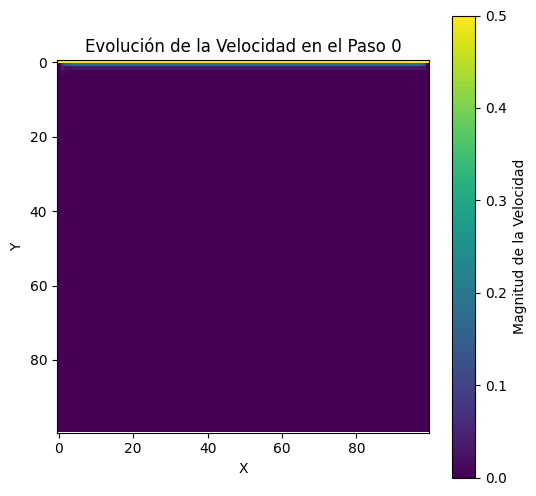

In [14]:
# Crear la figura para la animación
fig = plt.figure(figsize=(6, 6))

# Crear la animación
anim = ani.FuncAnimation(fig, update, frames=1001, interval=50)  # 1001 pasos, intervalo de 50 ms entre frames

from IPython.display import HTML
HTML(anim.to_jshtml())

### **Reference**
[1] Matyka, M., & Dzikowski, M. (2021). Memory-efficient Lattice Boltzmann Method for low Reynolds number flows. Computer Physics Communications, 267, 108044. https://doi.org/10.1016/j.cpc.2021.108044